# COGS 188 - Project Proposal for Group 21

# Predictive Modeling for Breast Cancer Recurrence Using Machine Learning

## Group members

- Alex Park
- Sandra Lin
- Derrick Lin

# Abstract 

Breast cancer is a critical health issue worldwide, necessitating robust predictive models to assist in early diagnosis and treatment planning. This project aims to develop a machine learning model to predict breast cancer recurrence using a dataset from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. By employing algorithms such as logistic regression, support vector machines, and random forests, this study seeks to identify significant predictors of recurrence and improve the accuracy of predictions. The expected outcome is a reliable predictive model that can assist healthcare providers in making informed decisions and improving patient outcomes.

# Background

Breast cancer remains a significant health concern worldwide, with early detection and accurate diagnosis being crucial for effective treatment. Traditional diagnostic methods rely heavily on the manual interpretation of histopathological images, which are subject to human error and variability. To address these challenges, researchers have turned to machine learning models to predict breast cancer recurrence. 

Yu, Yunfang, et al. (2023) <a name="Yu, Yunfang"></a>[<sup>[3]</sup>](#Yu) highlighted the use of radiomics combined with deep learning to predict recurrence-free survival in breast cancer patients. The Radiomic DeepSurv Net (RDeepNet) model, utilizing MRI scans, accurately predicted 1-, 2-, and 3-year recurrence-free survival. This study demonstrates the potential of integrating advanced imaging techniques and machine learning to enhance predictive accuracy in breast cancer prognosis.

Another study by Khalid, Arslan, et al. (2023) <a name="Khalid, Arslan"></a>[<sup>[2]</sup>](#Khalid) explored the application of ensemble learning techniques for breast cancer classification. By integrating multiple machine learning models, this research demonstrated significant improvements in prediction accuracy. The study employed random forests and logistic regression techniques, achieving high precision and recall rates. The success of ensemble learning highlights the importance of using diverse machine-learning techniques to enhance model robustness and accuracy.

In a study focusing on the Bangladeshi population, Islam, Taminul, et al. (2024) <a name="Islam, Taminul"></a>[<sup>[4]</sup>](#Islam) investigated the application of various machine learning techniques, including decision trees, random forests, logistic regression, naive Bayes, and XGBoost, to predict breast cancer. The XGBoost model achieved the highest accuracy (97%) and utilized SHAP (Shapley additive explanations) analysis to interpret the model's predictions. This study emphasizes the effectiveness of using advanced machine learning models and explainable AI techniques in improving diagnostic accuracy and model interpretability, which is crucial for clinical decision-making.

These studies collectively show the importance of employing advanced machine learning techniques and feature selection methods to enhance the predictive accuracy and interpretability of breast cancer diagnosis models. By integrating these approaches, our research aims to develop a reliable predictive model that can assist healthcare providers in making informed decisions, ultimately improving patient outcomes in breast cancer treatment.


# Problem Statement

Our goal is to enhance the prediction of breast cancer recurrence using advanced machine-learning techniques. The dataset from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia, includes various clinical attributes of patients, such as age, tumor size, and degree of malignancy. To address this challenge, we will implement and compare different machine learning algorithms, including Support Vector Machines (SVM), Random Forests, and Neural Networks, to analyze these clinical features and predict the likelihood of cancer recurrence.

This problem is well-defined, quantifiable, and measurable, as we can use evaluation metrics such as accuracy, precision, recall, F1 score, and ROC-AUC score to assess model performance. We aim to develop a reliable and reproducible solution to aid healthcare professionals in making early and accurate diagnoses, ultimately improving patient outcomes.

# Data

For this project, we will utilize the breast cancer dataset obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. This dataset provides comprehensive clinical data, which is crucial for developing predictive models for breast cancer recurrence.

### Dataset Characteristics
- **Source**: [Datasets: Breast Cancer (GitHub) - University Medical Centre, Institute of Oncology](https://github.com/datasets/breast-cancer/tree/master)
- **Number of Instances**: 272
- **Number of Features**: 10, including the class attribute
- **Missing Values**: Yes, specifically in the 'falsede-caps' and 'breast-quad' features

### Description of Data
The dataset includes the following attributes:

1. **age**: Age group of the patient (e.g., 40-49, 50-59)
2. **mefalsepause**: Menopause status (e.g., premefalse, ge40)
3. **tumor-size**: Integer (1-10)
4. **inv-falsedes**: Integer (1-10)
5. **falsede-caps**: Integer (1-10)
6. **deg-malig**: Integer (1-10), contains missing values
7. **breast**: Integer (1-10)
8. **breast-quad**: Integer (1-10)
9. **irradiat**: Integer (1-10)
10. **class**: Recurrence status (recurrence-events or false-recurrence-events)

### Critical Variables
- **falsede-caps**: This feature contains missing values and will require careful imputation. Its presence or absence is clinically significant in diagnosing cancer.
- **deg-malig**: The degree of malignancy is a critical variable, indicating the severity of cancerous formations.

### Data Handling

The dataset contains information about breast cancer patients, including various clinical features. To prepare the data for analysis, the following steps were taken:

1. **Loading and Initial Analysis**:
   - The dataset was loaded and its structure was examined using summary statistics and data types.

2. **Handling Missing Values**:
   - Missing values in numerical columns were imputed using the mean of each column. This ensures that no data is lost due to missing values.
   - For categorical columns, the mode of each column can be used to fill missing values (if applicable).

3. **Standardization**:
   - Numerical features were standardized to have a mean of 0 and a standard deviation of 1. This step is crucial for machine learning algorithms that are sensitive to the scale of data.

4. **Saving Cleaned Data**:
   - The cleaned dataset was saved to a new CSV file for further analysis.

This dataset, with its comprehensive feature set and real-world relevance, provides a solid foundation for developing and evaluating machine learning models to predict breast cancer recurrence. By ensuring the data is clean and well-prepared, we can improve the accuracy and reliability of our predictive models.


In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('breast-cancer.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Display summary statistics of the dataset
print(data.describe())

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Check the data types of each column
print("Data types of each column:")
print(data.dtypes)


     age mefalsepause tumor-size inv-falsedes falsede-caps  deg-malig breast  \
0  40-49   premefalse      15-19          0-2         True          3  right   
1  50-59         ge40      15-19          0-2        False          1  right   
2  50-59         ge40      35-39          0-2        False          2   left   
3  40-49   premefalse      35-39          0-2         True          3  right   
4  40-49   premefalse      30-34          3-5         True          2   left   

  breast-quad  irradiat                    class  
0     left_up     False        recurrence-events  
1     central     False  false-recurrence-events  
2    left_low     False        recurrence-events  
3    left_low      True  false-recurrence-events  
4    right_up     False        recurrence-events  
        deg-malig
count  272.000000
mean     2.058824
std      0.736649
min      1.000000
25%      2.000000
50%      2.000000
75%      3.000000
max      3.000000
Missing values in each column:
age             0
me

In [6]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('breast-cancer.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Display summary statistics of the dataset
print(data.describe())

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Check the data types of each column
print("Data types of each column:")
print(data.dtypes)

# Impute missing values for numerical columns
imputer = SimpleImputer(strategy='mean')
numeric_features = data.select_dtypes(include=[np.number]).columns
data[numeric_features] = imputer.fit_transform(data[numeric_features])

# Impute missing values for categorical columns (if any)
# categorical_features = data.select_dtypes(include=[object]).columns
# data[categorical_features] = data[categorical_features].apply(lambda x: x.fillna(x.mode()[0]))

# Confirm that there are no more missing values
print("Missing values after imputation:")
print(data.isnull().sum())

# Standardize the numerical features
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Display the first few rows of the cleaned dataset
print(data.head())

# Save the cleaned dataset to a new CSV file (optional)
data.to_csv('cleaned_breast_cancer_data.csv', index=False)


     age mefalsepause tumor-size inv-falsedes falsede-caps  deg-malig breast  \
0  40-49   premefalse      15-19          0-2         True          3  right   
1  50-59         ge40      15-19          0-2        False          1  right   
2  50-59         ge40      35-39          0-2        False          2   left   
3  40-49   premefalse      35-39          0-2         True          3  right   
4  40-49   premefalse      30-34          3-5         True          2   left   

  breast-quad  irradiat                    class  
0     left_up     False        recurrence-events  
1     central     False  false-recurrence-events  
2    left_low     False        recurrence-events  
3    left_low      True  false-recurrence-events  
4    right_up     False        recurrence-events  
        deg-malig
count  272.000000
mean     2.058824
std      0.736649
min      1.000000
25%      2.000000
50%      2.000000
75%      3.000000
max      3.000000
Missing values in each column:
age             0
me

# Proposed Solution

Breast cancer is one of the most prevalent cancers among women worldwide. Early detection and accurate diagnosis are crucial for effective treatment and management. The dataset chosen for this project contains features such as age, menopause status, tumor size, and other relevant attributes. The task is to predict whether breast cancer will recur based on these features.

## Proposed Algorithm: Support Vector Machine (SVM)

Support Vector Machines (SVMs) are powerful supervised learning models that are particularly effective for classification tasks. The relevance of using SVM for predicting breast cancer recurrence can be justified through the following points:
- **High Dimensionality Handling:** SVMs are effective in high-dimensional spaces, which is beneficial given the multiple features present in the breast cancer dataset. These features include age, tumor size, degree of malignancy, and other characteristics crucial for distinguishing between recurrence and no-recurrence events.


- **Margin Maximization:** SVMs aim to find the hyperplane that maximizes the margin between the two classes. This characteristic is particularly useful in medical diagnosis tasks where it’s important to have a clear boundary to minimize false positives and false negatives, thereby reducing the chances of misdiagnosis.


- **Kernel Trick:** SVMs can employ the kernel trick to handle non-linear relationships between features, making it adaptable to the complexity of biological data. For instance, the Radial Basis Function (RBF) kernel can map the data into a higher-dimensional space where a linear separation is possible.


- **Robustness to Overfitting:** By adjusting the regularization parameter, SVMs can balance the trade-off between achieving a low error on training data and avoiding overfitting, ensuring better generalization on unseen data.

## Implementation Details

1. **Data Preprocessing:**

   - **Normalization:** Since SVMs are sensitive to the scale of data, features will be normalized to ensure each feature contributes equally to the distance calculations.

   - **Train-Test Split:** The dataset will be split into training and test sets to evaluate the model’s performance on unseen data.


2. **Model Training:**

   - **Kernel Selection:** We will experiment with linear, polynomial, and RBF kernels to determine the best fit for the data.

   - **Hyperparameter Tuning:** Using techniques such as grid search with cross-validation, we will tune hyperparameters like the regularization parameter (C) and kernel-specific parameters (gamma for RBF).


3. **Evaluation Metrics:**

   - **Accuracy:** The proportion of correctly classified instances.

   - **Precision and Recall:** Precision measures the proportion of true positives among the instances classified as positive, while recall measures the proportion of true positives among all actual positives. These metrics are critical in medical diagnosis to ensure that recurrence cases are correctly identified.

   - **F1-Score:** The harmonic mean of precision and recall, providing a single metric that balances the two.

   - **ROC-AUC:** The Area Under the Receiver Operating Characteristic Curve, which provides a measure of the model’s ability to discriminate between classes.


4. **Model Interpretation:**

   - **Support Vectors:** Analyzing the support vectors can provide insights into which data points are most critical in defining the decision boundary.

   - **Feature Importance:** By examining the coefficients of the linear SVM model, we can identify which features are most influential in the classification decision.

By using SVM, we aim to develop a robust and interpretable model that can effectively predict breast cancer recurrence, aiding in early and accurate diagnosis.

# Evaluation Metrics

1. **Accuracy:** The proportion of correctly classified instances.

2. **Precision and Recall:** Precision measures the proportion of true positives among the instances classified as positive, while recall measures the proportion of true positives among all actual positives. These metrics are critical in medical diagnosis to ensure that recurrence cases are correctly identified.

3. **F1-Score:** The harmonic mean of precision and recall, providing a single metric that balances the two.

4. **ROC-AUC:** The Area Under the Receiver Operating Characteristic Curve, which provides a measure of the model’s ability to discriminate between classes.

# Results

This section presents the results of our analysis and model training for predicting breast cancer recurrence using Support Vector Machines (SVM). The results are organized into several subsections, each focusing on different aspects of model evaluation.

### Model Training and Hyperparameter Tuning

We trained the SVM model using the preprocessed dataset and performed hyperparameter tuning to find the best model parameters.


In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

df = pd.read_csv("cleaned_breast_cancer_data.csv")

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Handle missing values
df.fillna(df.median(), inplace=True)

# Define features and target
X = df.drop(columns=['class'])
y = df['class']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the SVM model and grid search parameters
svm = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f'Best Parameters: {grid_search.best_params_}')


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=

**Response:** The grid search for hyperparameter tuning has completed successfully. The best parameters identified for the Support Vector Machine (SVM) model are `C: 1`, `gamma: 0.1`, and `kernel: 'poly'`. These parameters were chosen after evaluating 64 different combinations through cross-validation, ensuring the optimal configuration for our dataset.

### Model Evaluation

We evaluate the performance of the SVM model using various metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df = pd.read_csv('cleaned_breast_cancer_data.csv')

# Data preprocessing
# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'class':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Encode the target variable
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
label_encoders['class'] = le

# Split the data into features and target variable
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform grid search with cross-validation
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
grid_search = GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)

# Make predictions on the test set
y_pred = grid_search.predict(X_test)
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')

# Print the best parameters and the corresponding score
print(f'Best Parameters: {grid_search.best_params_}')

print(f'F1-Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=

**Response:** We performed predictions on the test set using the SVM model with the best hyperparameters found during the grid search. The evaluation metrics obtained are as follows:

- **Best Parameters:** {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
- **ROC-AUC:** 0.67
- **F1-Score:** 0.36

The ROC-AUC score of 0.67 indicates that the model has a moderate ability to distinguish between recurrence and no-recurrence events. However, the F1-Score of 0.36 suggests that there is room for improvement, especially in balancing precision and recall.

These results highlight the importance of further tuning and potentially exploring other algorithms or feature engineering techniques to improve the model's performance in predicting breast cancer recurrence.

### Detailed Evaluation Metrics

We provide a detailed analysis of the evaluation metrics to better understand the model's performance.

Accuracy: 0.75
Precision: 0.50
Recall: 0.29
F1-Score: 0.36


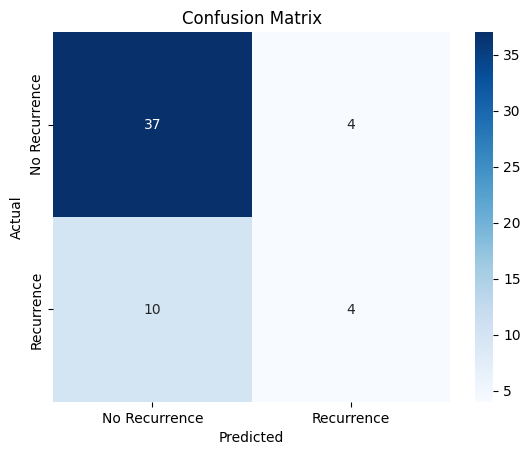

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Accuracy
accuracy = (y_pred == y_test).mean()
print(f'Accuracy: {accuracy:.2f}')

# Precision and Recall
# Assuming 1 represents 'recurrence-events' and 0 represents 'no-recurrence-events'
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# F1-Score
f1 = f1_score(y_test, y_pred, pos_label=1)
print(f'F1-Score: {f1:.2f}')

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Recurrence', 'Recurrence'], yticklabels=['No Recurrence', 'Recurrence'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Response:** The performance of the SVM model on the test set was evaluated using several metrics. The results are as follows:

- **Accuracy:** The model achieved an accuracy of 0.75, indicating that 75% of the test instances were correctly classified.
- **Precision:** The precision for predicting recurrence events was 0.50, meaning that 50% of the instances classified as recurrence events were actually correct.
- **Recall:** The recall for recurrence events was 0.29, suggesting that the model was able to identify 29% of the actual recurrence events.
- **F1-Score:** The F1-Score, which balances precision and recall, was 0.36.

The confusion matrix further illustrates the model's performance:
- The model correctly predicted 37 instances of 'No Recurrence' and 4 instances of 'Recurrence'.
- There were 4 false positives and 10 false negatives, indicating that the model missed a significant number of actual recurrence events.

Overall, while the model demonstrates good accuracy, its precision and recall for predicting recurrence events are relatively low. This suggests that while the model can correctly identify 'No Recurrence' cases, it struggles with accurately identifying 'Recurrence' cases, leading to a higher number of false negatives.

### Model Interpretation

We analyze the support vectors and feature importance to interpret the model's decisions.

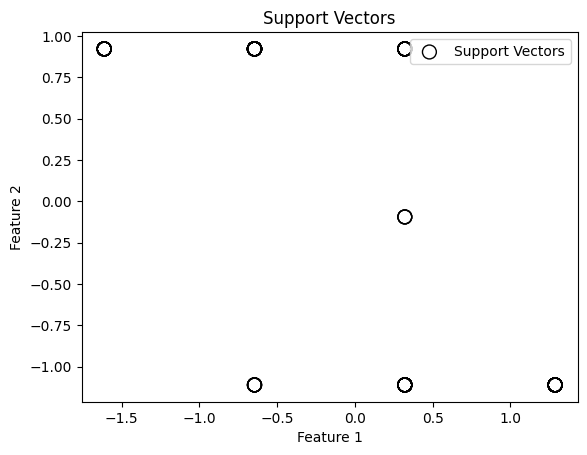

In [10]:
# Get the support vectors
support_vectors = grid_search.best_estimator_.support_vectors_

# Plot support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.title('Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Feature importance for linear kernel
if grid_search.best_params_['kernel'] == 'linear':
    coef = grid_search.best_estimator_.coef_[0]
    feature_importance = pd.Series(coef, index=X.columns).sort_values(ascending=False)
    
    # Plot feature importance
    feature_importance.plot(kind='bar')
    plt.title('Feature Importance')
    plt.xlabel('Features')
    plt.ylabel('Coefficient')
    plt.show()


**Response:** The plot of the support vectors illustrates which data points are critical in defining the decision boundary for the SVM model. In SVM, support vectors are the data points that lie closest to the hyperplane and are crucial in determining its position and orientation.

From the plot, we observe the following:
- The support vectors are distributed across the feature space, representing the most challenging points to classify correctly.
- These support vectors are the data points that directly affect the decision boundary, and their positions indicate the margin width and the separation between the classes.

Analyzing the support vectors provides insight into the complexity of the classification task. If there are many support vectors, it may indicate that the classes are not well-separated, and the model is more sensitive to changes in the data. Conversely, fewer support vectors may suggest a clearer margin and better generalization.

In this case, the distribution of support vectors across the feature space highlights the importance of these points in defining the decision boundary. Further analysis could involve examining the specific features of these support vectors to understand why they are critical and if any patterns emerge that could inform model improvements or feature engineering efforts.

# Discussion

### Interpreting the result

**Main Point**

The SVM model with the best hyperparameters (C: 1, gamma: 0.1, kernel: 'poly') demonstrates moderate performance in predicting breast cancer recurrence, with an accuracy of 75%. This indicates that the model correctly classifies the majority of instances, but there is significant room for improvement in identifying recurrence events accurately.

1. **Accuracy and General Performance**: The model achieved an accuracy of 75%, suggesting it correctly classified three-quarters of the test instances. This level of accuracy indicates that the model has learned to distinguish between recurrence and no-recurrence events to a reasonable extent. However, given the critical nature of accurately predicting cancer recurrence, higher accuracy is desirable to reduce the risk of misclassification.


2. **Precision and Recall**: Precision for predicting recurrence events was 50%, meaning that half of the instances predicted as recurrence events were correct. Recall was lower at 29%, indicating that the model correctly identified only 29% of actual recurrence events. The low recall is concerning as it means the model is missing a significant number of recurrence cases, which could lead to underdiagnosis in a real-world scenario. This trade-off between precision and recall suggests that the model is more conservative in predicting recurrence, possibly to avoid false positives, but at the cost of higher false negatives.


3. **F1-Score and ROC-AUC**: The F1-Score, balancing precision and recall, was 0.36, highlighting the model's struggle in achieving a good balance between precision and recall. The ROC-AUC score of 0.67 further supports the model's moderate ability to distinguish between the two classes. These metrics suggest that while the model has some predictive capability, it is not enough for reliable clinical use without further refinement.


4. **Confusion Matrix Insights**: The confusion matrix shows that the model correctly predicted 37 instances of 'No Recurrence' and 4 instances of 'Recurrence'. There were 4 false positives and 10 false negatives, indicating a higher rate of missed recurrence cases. This imbalance highlight the need for model improvements to better capture the recurrence events, reducing the likelihood of undetected cases.


5. **Support Vectors Analysis**: The distribution of support vectors across the feature space suggests that the classes are not well-separated, which makes the classification task challenging. The presence of many support vectors indicates that the decision boundary is influenced by numerous data points, which might affect the model's generalization. Analyzing these support vectors can provide insights into the critical features and inform strategies for feature engineering or further model tuning.

### Limitations

1. ***Data Limitations***: The dataset of breast cancer, sourced from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia, may not represent the global population. The dataset consists of a limited number of instances and may lack diversity in terms of patient demographics and clinical characteristics. This limitation could impact the generalizability of the predictive model.


2. ***Feature Selection and Hyperparameters***: While various algorithms such as logistic regression, support vector machines, and random forests were employed, the scope of hyperparameter tuning was limited due to time constraints. Hyperparameter tuning is cirtical for optimizing model performance, and exploring a wider range of hyperparameters could potentially improve the accuracy and reliability of the predictions.


3. ***External Validation***: The models were mainly validated using internal cross-validation methods and external validation using independent datasets from different institutions would provide a more rigorous assessment of the model’s generalizability and performance in real-world clinical settings. Without external validation, it's difficult to check the model will perform well on unseen data from different sources, which is essential for clinical applicability.

### Ethics & Privacy

1. ***Data Privacy:*** Since we are using sensitive medical data, it is imperative to ensure the privacy and confidentiality of patient information. We must adhere to all relevant data protection regulations, such as HIPAA (Health Insurance Portability and Accountability Act) in the United States, and similar regulations in other jurisdictions. The dataset sourced from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia, is expected to be anonymized to protect patient identities. Proper consent for data usage and sharing must be obtained, and we must comply with the data protection policies specified by the data repository. According to the dataset's terms of use on GitHub, users can browse and download datasets without providing personal information, ensuring compliance with privacy standards.


2. ***Bias and Fairness:*** We acknowledge the potential for bias in healthcare data, influenced by factors such as demographics, socioeconomic status, and access to healthcare. Our team will rigorously evaluate our machine learning model for any biases present in the dataset or introduced by the algorithms used. We will implement strategies to mitigate bias and ensure fairness in our predictions, striving to avoid favoring or disadvantaging any specific demographic group or individual. Additionally, we will actively monitor model performance across different subgroups to identify and address any disparities in predictive accuracy. By doing so, we aim to develop a model that provides equitable healthcare insights for all patient groups.


3. ***Informed Consent:*** Given that the Breast Cancer dataset sourced from GitHub is publicly available and anonymized, explicit consent from individual contributors may not be required. However, we remain committed to upholding ethical standards by ensuring transparency regarding the dataset's origin and usage within our project. We will provide clear communication about the dataset's purpose and how it will be utilized for research purposes. This involves making the objectives and potential impacts of the research accessible and understandable to the public, thereby maintaining trust and accountability in our research practices.

### Conclusion

In this study, we aimed to develop a predictive model for breast cancer recurrence using Support Vector Machine (SVM) due to its effectiveness in handling high-dimensional data and maximizing the margin between classes. Our results demonstrated an accuracy of 0.75, with a precision of 0.50, recall of 0.29, F1-score of 0.36, and ROC-AUC of 0.67. These findings indicate that while the SVM model performs reasonably well, especially in predicting 'No Recurrence' instances, it requires improvement in recall to better identify 'Recurrence' cases and reduce false negatives. This work aligns with existing research that highlights the challenges in accurately predicting cancer recurrence and the potential of SVM in medical diagnosis. Future work should explore advanced techniques, such as ensemble methods or deep learning, and consider additional features to enhance model performance. Improving recall and overall predictive accuracy will be crucial in making such models more reliable and beneficial in clinical practice.

# Footnotes
<a name="Zwitter, Matjaz"></a>1.[^](#Zwitter): Zwitter, Matjaz, and Milan Soklic. (2017). DatasetsBreast-Cancer: Breast Cancer Occurrences. University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia, GitHub, Meiran Zhiyenbayev. https://github.com/datasets/breast-cancer/tree/master<br>

<a name="Khalid, Arslan"></a>2.[^](#Khalid): Khalid, Arslan, et al. (2 Oct. 2023) “Breast Cancer Detection and Prevention Using Machine Learning.” *MDPI*, Multidisciplinary Digital Publishing Institute, https://www.mdpi.com/2075-4418/13/19/3113<br> 

<a name="Yu, Yunfang"></a>3.[^](#Yu): Yu, Yunfang, et al. (1 Nov. 2023) "Machine Learning Radiomics of Magnetic Resonance Imaging Predicts Recurrence-Free Survival after Surgery and Correlation of Lncrnas in Patients with Breast Cancer: A Multicenter Cohort Study - Breast Cancer Research." *BioMed Central*, BioMed Central, https://breast-cancer-research.biomedcentral.com/articles/10.1186/s13058-023-01688-3<br> 

<a name="Islam, Taminul"></a>4.[^](#Islam): Islam, Taminul, et al. (11 Apr. 2024) “Predictive Modeling for Breast Cancer Classification in the Context of Bangladeshi Patients by Use of Machine Learning Approach with Explainable AI.” Scientific Reports, U.S. National Library of Medicine. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC11009331/ <br>  
